In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import itertools
%matplotlib inline

In [45]:
X, y = make_blobs(n_samples=400, 
                  centers=2, 
                  n_features=2,
                  cluster_std=[3,4], 
                  random_state=999)

In [46]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [47]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=50)

[]

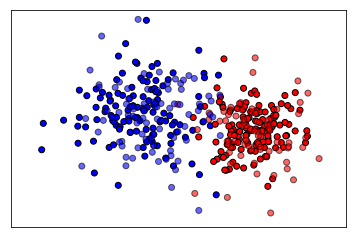

In [48]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

In [49]:
clf = KNeighborsClassifier(3)

In [50]:
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print('Accuracy: ', score)

Accuracy:  0.925


In [51]:
Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

In [52]:
Z.shape

(39, 28)

[]

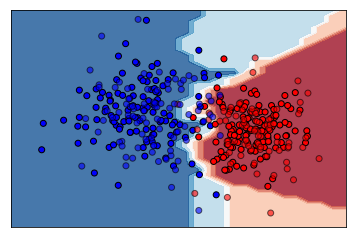

In [53]:
ax = plt.subplot()

ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

In [54]:
clf = SVC(gamma=0.1, C=1)
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print('Accuracy: ', score)

Accuracy:  0.95


In [55]:
locs = np.c_[xx.ravel(),yy.ravel()]
print(locs.shape)
Z = clf.decision_function(locs)
Z = Z.reshape(xx.shape)

(1092, 2)


In [56]:
Z.shape

(39, 28)

[]

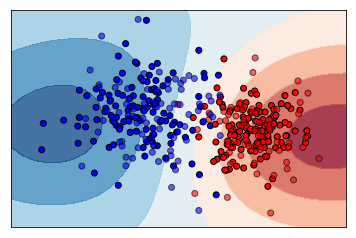

In [57]:
ax = plt.subplot()

ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

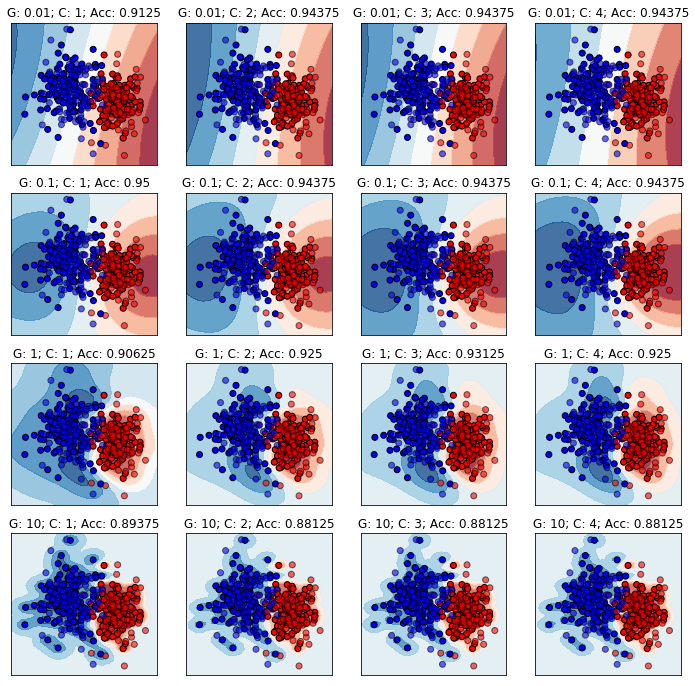

In [58]:
gammas = [0.01, 0.1, 1, 10]
Cs = [1, 2, 3, 4]
combos = list(itertools.product(gammas,Cs))

figure = plt.figure(figsize=(3*len(gammas),3*len(Cs)))

i=1
for gamma, C in combos:
    
    clf = SVC(gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    locs = np.c_[xx.ravel(),yy.ravel()]
    Z = clf.decision_function(locs)
    Z = Z.reshape(xx.shape)
    
    ax = plt.subplot(len(gammas),len(Cs),i)
    ax.contourf(xx, yy , Z, cmap = cm, alpha = 0.8)
    label = 'G: ' + str(gamma) + '; C: ' + str(C) + '; Acc: ' + str(score)
    ax.set_title(label)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i+=1